# KNN

# Iris Data

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
def plot_decision_region(X,y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max =X[:,0].min()- 1,X[:,0].max()+1
    x2_min, x2_max =X[:,1].min()- 1,X[:,1].max()+1
    xx1,xx2 =np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y== cl,0],y=X[y==cl,1],
                    alpha=0.8,c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolors='black')
    
    if test_idx:
        X_test,y_test =X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='white',edgecolors='black',alpha=0.3,
                    linewidths=1,marker='o',s=100,label='test_set')

In [6]:
# cargamos los datos

df = datasets.load_iris()
X = df.data[:,[2,3]]
y = df.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=1,test_size=0.3)
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [29]:
knn_model=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn_model.fit(X_train_std,y_train)
predicts=knn_model.predict(X_test_std)
score=knn_model.score(X_test_std,y_test)
ac_score=accuracy_score(y_test,predicts)
print(f"Score: {score}\nAccuracy_Score: {ac_score}")

Score: 0.9777777777777777
Accuracy_Score: 0.9777777777777777


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13548\1750828427.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl,0],y=X[y==cl,1],


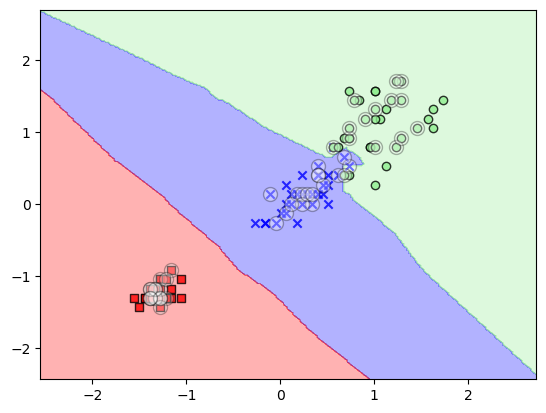

In [30]:
plot_decision_region(X_train_std,y_train,classifier=knn_model,test_idx=range(55,105))